In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from operator import itemgetter
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

pd.set_option('display.max_columns', None)

/kaggle/input/nyc-school-quality-20172018/2017-2018_NYC_School_Quality.csv


***Overview***
* The dataset is from [2017-2018 School Quality Reports - Elem, Middle & K-8](http://data.cityofnewyork.us/Education/2017-2018-School-Quality-Reports-Elem-Middle-K-8/g6v2-wcvk)
* The dataset contains a list of schools from New York City with various features. 
* The goal of the project is to analyze the dataset then build a model that could predict the **Student Achievement Rating** of schools.  

In [2]:
df = pd.read_csv('../input/nyc-school-quality-20172018/2017-2018_NYC_School_Quality.csv')
df.shape

(1284, 26)

In [3]:
df.head()

,DBN,School Name,School Type,Enrollment,Student Achievement Rating,Rigorous Instruction - Percent Positive,Collaborative Teachers - Percent Positive,Supportive Environment - Percent Positive,Effective School Leadership - Percent Positive,Strong Family-Community Ties - Percent Positive,Trust - Percent Positive,Percent English Language Learners,Percent Students with Disabilities,Percent Self-Contained,Economic Need Index,Percent in Temp Housing,Percent HRA Eligible,Percent Asian,Percent Black,Percent Hispanic,Percent White,Years of principal experience at this school,Percent of teachers with 3 or more years of experience,Student Attendance Rate,Percent of Students Chronically Absent,Teacher Attendance Rate
0,01M015,P.S. 015 Roberto Clemente,Elementary,173,Exceeding Target,0.84,0.92,0.82,0.94,0.94,0.94,0.046,0.260,0.040,0.895,0.405,0.786,0.098,0.254,0.601,0.035,7.8,0.625,0.939,0.186,0.985
1,01M019,P.S. 019 Asher Levy,Elementary,244,Exceeding Target,0.85,0.87,0.88,0.84,0.94,0.88,0.033,0.361,0.111,0.689,0.143,0.549,0.094,0.197,0.631,0.066,8.8,0.762,0.914,0.353,0.968
2,01M020,P.S. 020 Anna Silver,Elementary,463,Approaching Target,0.69,0.80,0.76,0.82,0.93,0.85,0.186,0.253,0.091,0.799,0.199,0.693,0.309,0.102,0.523,0.026,1.8,0.622,0.930,0.274,0.967
3,01M034,P.S. 034 Franklin D. Roosevelt,K-8,320,Approaching Target,0.73,0.61,0.61,0.64,0.90,0.72,0.078,0.378,0.028,0.930,0.266,0.863,0.034,0.316,0.613,0.031,1.7,0.737,0.901,0.391,0.976
4,01M063,The STAR Academy - P.S.63,Elementary,177,Exceeding Target,0.77,0.92,0.83,0.93,0.95,0.94,0.011,0.356,0.006,0.779,0.254,0.638,0.028,0.175,0.650,0.107,10.9,0.474,0.927,0.261,0.980


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 26 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   DBN                                                     1284 non-null   object 
 1   School Name                                             1284 non-null   object 
 2   School Type                                             1284 non-null   object 
 3   Enrollment                                              1284 non-null   int64  
 4   Student Achievement Rating                              1185 non-null   object 
 5   Rigorous Instruction - Percent Positive                 1256 non-null   float64
 6   Collaborative Teachers - Percent Positive               1258 non-null   float64
 7   Supportive Environment - Percent Positive               1256 non-null   float64
 8   Effective School Leadership - Percent 

In [5]:
df.describe()

,Enrollment,Rigorous Instruction - Percent Positive,Collaborative Teachers - Percent Positive,Supportive Environment - Percent Positive,Effective School Leadership - Percent Positive,Strong Family-Community Ties - Percent Positive,Trust - Percent Positive,Percent English Language Learners,Percent Students with Disabilities,Percent Self-Contained,Economic Need Index,Percent in Temp Housing,Percent HRA Eligible,Percent Asian,Percent Black,Percent Hispanic,Percent White,Years of principal experience at this school,Percent of teachers with 3 or more years of experience,Student Attendance Rate,Percent of Students Chronically Absent,Teacher Attendance Rate
count,1284.000000,1256.000000,1258.000000,1256.000000,1274.000000,1274.000000,1274.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1097.000000,1105.000000,1255.000000,1251.000000,1105.000000
mean,549.045950,0.818639,0.848172,0.779045,0.859961,0.911421,0.891774,0.139214,0.219345,0.059733,0.738023,0.149633,0.655988,0.118163,0.309741,0.416305,0.131322,7.073929,0.768817,0.929675,0.238127,0.962721
std,333.096587,0.073404,0.089597,0.101427,0.092103,0.042855,0.060187,0.118193,0.073947,0.049392,0.212339,0.103134,0.217162,0.176621,0.281557,0.261317,0.195826,4.940459,0.137261,0.026460,0.128432,0.010220
min,41.000000,0.450000,0.420000,0.480000,0.360000,0.560000,0.540000,0.000000,0.005000,0.000000,0.071000,0.000000,0.035000,0.000000,0.000000,0.015000,0.000000,0.100000,0.125000,0.663000,0.004000,0.913000
25%,301.750000,0.770000,0.800000,0.700000,0.810000,0.890000,0.860000,0.049000,0.168000,0.015000,0.634000,0.062750,0.534750,0.012000,0.059000,0.183750,0.013000,3.000000,0.696000,0.911000,0.133000,0.956000
50%,474.500000,0.830000,0.860000,0.770000,0.880000,0.920000,0.900000,0.109000,0.214000,0.052000,0.809000,0.135000,0.718500,0.036000,0.221000,0.357500,0.029000,5.900000,0.800000,0.933000,0.222000,0.962000
75%,704.500000,0.870000,0.920000,0.860000,0.930000,0.940000,0.930000,0.194000,0.264000,0.092000,0.901000,0.222000,0.827000,0.142500,0.541000,0.643250,0.164000,11.000000,0.866000,0.949000,0.340000,0.969000
max,2238.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.625000,0.313000,0.984000,0.521000,0.947000,0.943000,0.963000,1.000000,0.924000,33.800000,1.000000,1.000000,0.779000,0.998000


**Filling Missing Data**

In [6]:
df.isnull().sum()[df.isnull().sum()>0]

Student Achievement Rating                                 99
Rigorous Instruction - Percent Positive                    28
Collaborative Teachers - Percent Positive                  26
Supportive Environment - Percent Positive                  28
Effective School Leadership - Percent Positive             10
Strong Family-Community Ties - Percent Positive            10
Trust - Percent Positive                                   10
Years of principal experience at this school              187
Percent of teachers with 3 or more years of experience    179
Student Attendance Rate                                    29
Percent of Students Chronically Absent                     33
Teacher Attendance Rate                                   179
dtype: int64

In [7]:
def fill(data):
    for col in df.columns:
        if df[col].dtype != 'object':
            df[col] = df[col].fillna(df[col].mean())
        elif df[col].dtype == 'object':
            df[col] = df[col].fillna(df[col].mode()[0])
    return data

df = fill(df)
df.isnull().sum()

DBN                                                       0
School Name                                               0
School Type                                               0
Enrollment                                                0
Student Achievement Rating                                0
Rigorous Instruction - Percent Positive                   0
Collaborative Teachers - Percent Positive                 0
Supportive Environment - Percent Positive                 0
Effective School Leadership - Percent Positive            0
Strong Family-Community Ties - Percent Positive           0
Trust - Percent Positive                                  0
Percent English Language Learners                         0
Percent Students with Disabilities                        0
Percent Self-Contained                                    0
Economic Need Index                                       0
Percent in Temp Housing                                   0
Percent HRA Eligible                    

**Dropping Irrelevant Columns**

* Dropped DBN (School Code), School Name, and School Type.

In [8]:
df.drop(df.columns[0:3], axis=1, inplace=True)
df

,Enrollment,Student Achievement Rating,Rigorous Instruction - Percent Positive,Collaborative Teachers - Percent Positive,Supportive Environment - Percent Positive,Effective School Leadership - Percent Positive,Strong Family-Community Ties - Percent Positive,Trust - Percent Positive,Percent English Language Learners,Percent Students with Disabilities,Percent Self-Contained,Economic Need Index,Percent in Temp Housing,Percent HRA Eligible,Percent Asian,Percent Black,Percent Hispanic,Percent White,Years of principal experience at this school,Percent of teachers with 3 or more years of experience,Student Attendance Rate,Percent of Students Chronically Absent,Teacher Attendance Rate
0,173,Exceeding Target,0.84,0.92,0.82,0.94,0.94,0.94,0.046,0.260,0.040,0.895,0.405,0.786,0.098,0.254,0.601,0.035,7.800000,0.625000,0.939,0.186,0.985000
1,244,Exceeding Target,0.85,0.87,0.88,0.84,0.94,0.88,0.033,0.361,0.111,0.689,0.143,0.549,0.094,0.197,0.631,0.066,8.800000,0.762000,0.914,0.353,0.968000
2,463,Approaching Target,0.69,0.80,0.76,0.82,0.93,0.85,0.186,0.253,0.091,0.799,0.199,0.693,0.309,0.102,0.523,0.026,1.800000,0.622000,0.930,0.274,0.967000
3,320,Approaching Target,0.73,0.61,0.61,0.64,0.90,0.72,0.078,0.378,0.028,0.930,0.266,0.863,0.034,0.316,0.613,0.031,1.700000,0.737000,0.901,0.391,0.976000
4,177,Exceeding Target,0.77,0.92,0.83,0.93,0.95,0.94,0.011,0.356,0.006,0.779,0.254,0.638,0.028,0.175,0.650,0.107,10.900000,0.474000,0.927,0.261,0.980000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279,801,Exceeding Target,0.84,0.81,0.71,0.87,0.92,0.89,0.129,0.172,0.014,0.840,0.116,0.724,0.001,0.426,0.552,0.007,7.073929,0.768817,0.953,0.120,0.962721
1280,305,Approaching Target,0.82,0.85,0.83,0.83,0.85,0.85,0.249,0.082,0.000,0.883,0.089,0.803,0.010,0.203,0.777,0.003,7.073929,0.768817,0.946,0.121,0.962721
1281,680,Meeting Target,0.87,0.92,0.76,0.96,0.96,0.92,0.112,0.090,0.003,0.878,0.115,0.774,0.004,0.629,0.346,0.007,7.073929,0.768817,0.925,0.284,0.962721
1282,536,Meeting Target,0.88,0.92,0.87,0.95,0.98,0.96,0.021,0.093,0.002,0.599,0.032,0.493,0.017,0.854,0.099,0.015,7.073929,0.768817,0.949,0.134,0.962721


**Encoding Categorical Variable (Student Achievement Rating)**

In [9]:
df['Student Achievement Rating'].unique()

array(['Exceeding Target', 'Approaching Target', 'Meeting Target',
       'Not Meeting Target'], dtype=object)

*Note*
* **Not Meeting Target** was encoded as **0**. 
* **Meeting Target** was encoded as **1**. 
* **Approaching Target** was encoded as **2**. 
* **Exceeding Target** was encoded as **3**. 

In [10]:
df['Student Achievement Rating'] = OrdinalEncoder(categories=[['Not Meeting Target','Meeting Target','Approaching Target','Exceeding Target']]).fit_transform(df[['Student Achievement Rating']]).reshape((1,-1))[0]
df

#Referenced: https://datascience.stackexchange.com/questions/39317/difference-between-ordinalencoder-and-labelencoder

,Enrollment,Student Achievement Rating,Rigorous Instruction - Percent Positive,Collaborative Teachers - Percent Positive,Supportive Environment - Percent Positive,Effective School Leadership - Percent Positive,Strong Family-Community Ties - Percent Positive,Trust - Percent Positive,Percent English Language Learners,Percent Students with Disabilities,Percent Self-Contained,Economic Need Index,Percent in Temp Housing,Percent HRA Eligible,Percent Asian,Percent Black,Percent Hispanic,Percent White,Years of principal experience at this school,Percent of teachers with 3 or more years of experience,Student Attendance Rate,Percent of Students Chronically Absent,Teacher Attendance Rate
0,173,3.0,0.84,0.92,0.82,0.94,0.94,0.94,0.046,0.260,0.040,0.895,0.405,0.786,0.098,0.254,0.601,0.035,7.800000,0.625000,0.939,0.186,0.985000
1,244,3.0,0.85,0.87,0.88,0.84,0.94,0.88,0.033,0.361,0.111,0.689,0.143,0.549,0.094,0.197,0.631,0.066,8.800000,0.762000,0.914,0.353,0.968000
2,463,2.0,0.69,0.80,0.76,0.82,0.93,0.85,0.186,0.253,0.091,0.799,0.199,0.693,0.309,0.102,0.523,0.026,1.800000,0.622000,0.930,0.274,0.967000
3,320,2.0,0.73,0.61,0.61,0.64,0.90,0.72,0.078,0.378,0.028,0.930,0.266,0.863,0.034,0.316,0.613,0.031,1.700000,0.737000,0.901,0.391,0.976000
4,177,3.0,0.77,0.92,0.83,0.93,0.95,0.94,0.011,0.356,0.006,0.779,0.254,0.638,0.028,0.175,0.650,0.107,10.900000,0.474000,0.927,0.261,0.980000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279,801,3.0,0.84,0.81,0.71,0.87,0.92,0.89,0.129,0.172,0.014,0.840,0.116,0.724,0.001,0.426,0.552,0.007,7.073929,0.768817,0.953,0.120,0.962721
1280,305,2.0,0.82,0.85,0.83,0.83,0.85,0.85,0.249,0.082,0.000,0.883,0.089,0.803,0.010,0.203,0.777,0.003,7.073929,0.768817,0.946,0.121,0.962721
1281,680,1.0,0.87,0.92,0.76,0.96,0.96,0.92,0.112,0.090,0.003,0.878,0.115,0.774,0.004,0.629,0.346,0.007,7.073929,0.768817,0.925,0.284,0.962721
1282,536,1.0,0.88,0.92,0.87,0.95,0.98,0.96,0.021,0.093,0.002,0.599,0.032,0.493,0.017,0.854,0.099,0.015,7.073929,0.768817,0.949,0.134,0.962721


**Correlation Heatmap**

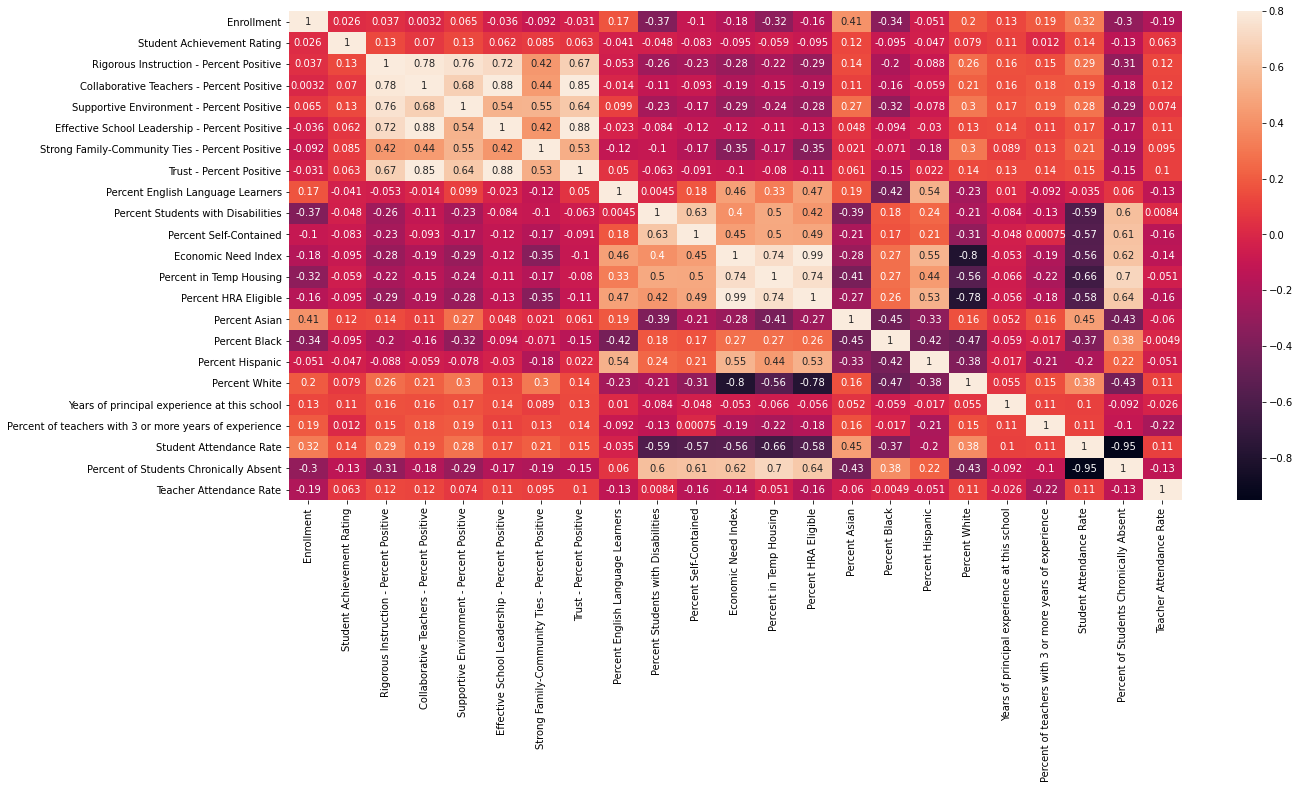

In [11]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(20,9))
sns.heatmap(corrmat, vmax=0.8, annot=True)
plt.show()

**Observing Chronically Absent Student**
* From the heatmap, there were several features that moderately correlate to chronic absenteeism. I was curious to see how they might relate to Student Achievement Rating.
* According to the Department of Education, chronically absent means a student has missed at least 15 days of school in a year. This puts them at serious risk of falling behind academically.

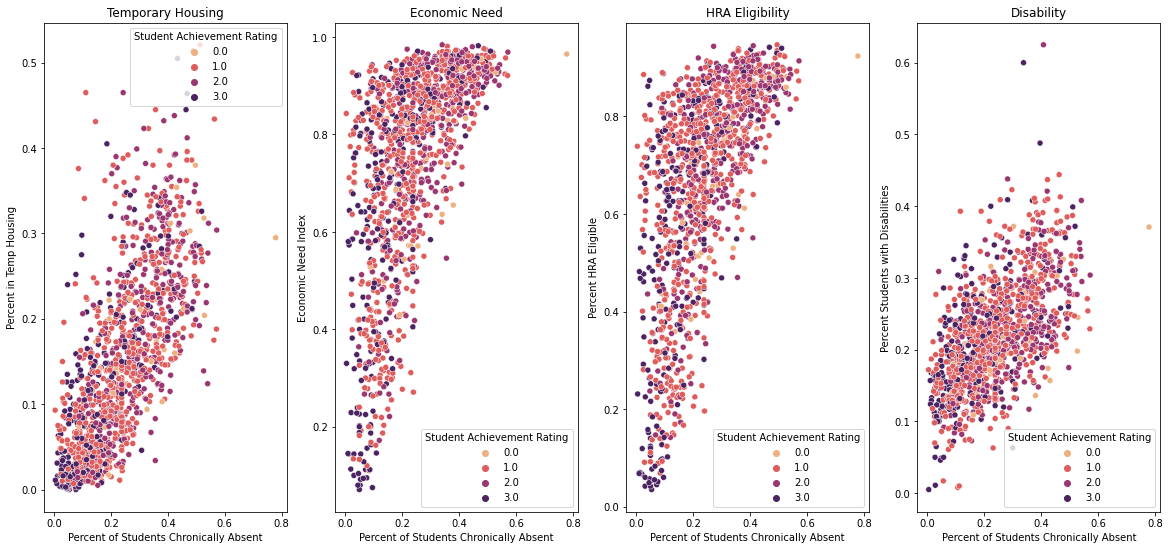

In [12]:
f, ax = plt.subplots(1,4,figsize=(20,9))

sns.scatterplot(data=df, x='Percent of Students Chronically Absent', y='Percent in Temp Housing', hue='Student Achievement Rating', palette='flare', ax=ax[0])
ax[0].set_title('Temporary Housing')

sns.scatterplot(data=df, x='Percent of Students Chronically Absent', y='Economic Need Index', hue='Student Achievement Rating', palette='flare', ax=ax[1])
ax[1].set_title('Economic Need')

sns.scatterplot(data=df, x='Percent of Students Chronically Absent', y='Percent HRA Eligible', hue='Student Achievement Rating', palette='flare', ax=ax[2])
ax[2].set_title('HRA Eligibility')

sns.scatterplot(data=df, x='Percent of Students Chronically Absent', y='Percent Students with Disabilities', hue='Student Achievement Rating', palette='flare',ax=ax[3])
ax[3].set_title('Disability')
plt.show()

*Interpretation*
* Higher percent of chronically absent students indicates higher percent of students living in temporary housings.
* Higher percent of chronically absent students indicates higher likelihoods of student living in poverty. 
* Higher percent of chronically absent students indicates higher percent of health reimbursement arrangement (HRA) eligibility and disabled students in school.

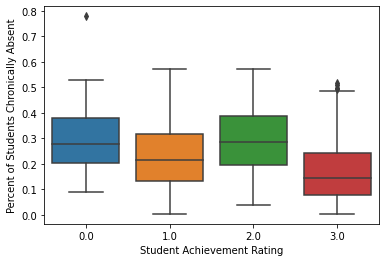

In [13]:
sns.boxplot(data=df,x='Student Achievement Rating', y='Percent of Students Chronically Absent')
plt.show()

*Interpretation* 
* Schools with high Student Achievement Rating tend to have lower percent of chronic absenteeism, but there are still several outliers that reached 50%.
* From approximation, there does not seem to be significant correlation between percent of chronically absent students and School Achievement Rating. 

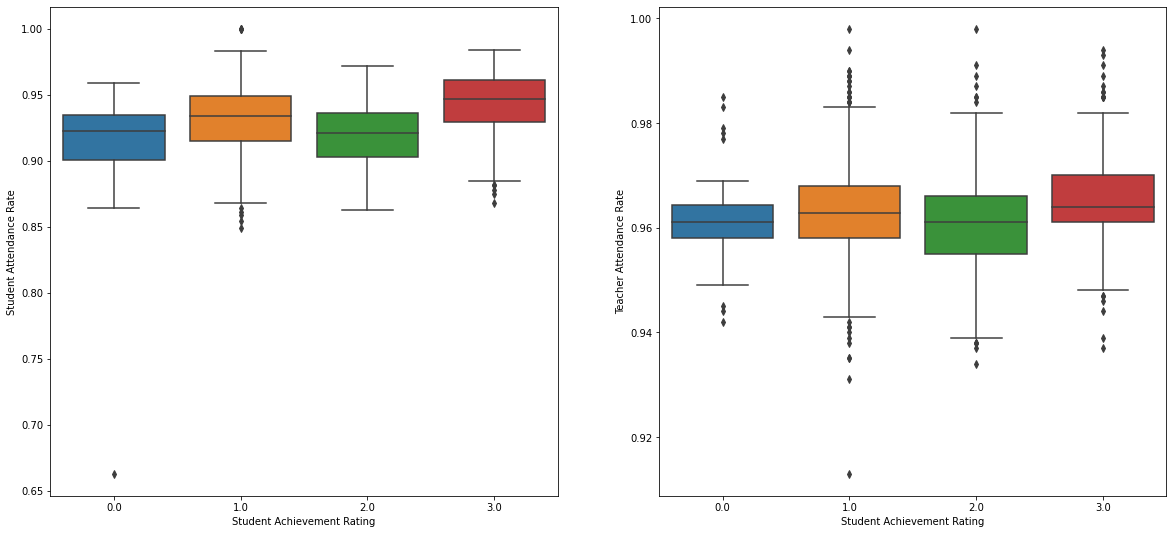

In [14]:
f, ax = plt.subplots(1,2, figsize=(20,9))
sns.boxplot(data=df, x='Student Achievement Rating', y='Student Attendance Rate',ax=ax[0])
sns.boxplot(data=df, x='Student Achievement Rating', y='Teacher Attendance Rate',ax=ax[1])
plt.show()

*Interpretation*
* From approximation, there does not seem to be significant correlations between student and teacher attendance rate and Student Achievement Rating.
* Schools with Student Achievement Rating of 3 have a slightly higher student attendance rate, but it is not significantly higher than schools of other ratings.

**Focusing On Student Achievement Rating**

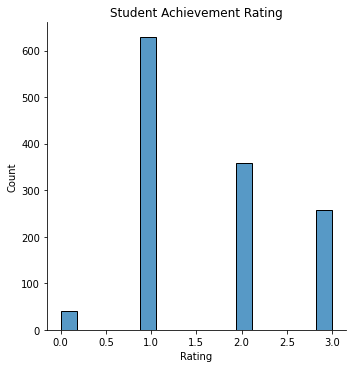

In [15]:
sns.displot(df['Student Achievement Rating'], kde=False)
plt.title('Student Achievement Rating')
plt.xlabel('Rating')
plt.show()

In [16]:
round(df['Student Achievement Rating'].value_counts(normalize=True)*100)

1.0    49.0
2.0    28.0
3.0    20.0
0.0     3.0
Name: Student Achievement Rating, dtype: float64

*Interpretation*
* Nearly half of the schools in the dataset have a Student Achievement Rating of 1 or Meeting Target.

In [17]:
corrmat['Student Achievement Rating'].sort_values()

Percent of Students Chronically Absent                   -0.131449
Percent Black                                            -0.094839
Economic Need Index                                      -0.094713
Percent HRA Eligible                                     -0.094624
Percent Self-Contained                                   -0.082881
Percent in Temp Housing                                  -0.058818
Percent Students with Disabilities                       -0.047516
Percent Hispanic                                         -0.046957
Percent English Language Learners                        -0.041167
Percent of teachers with 3 or more years of experience    0.011974
Enrollment                                                0.026148
Effective School Leadership - Percent Positive            0.062358
Trust - Percent Positive                                  0.063237
Teacher Attendance Rate                                   0.063272
Collaborative Teachers - Percent Positive                 0.06

*Interpretation*
* There is neither a strong positively-correlated nor a strong negatively-correlated feature to Student Achievement Rating in the dataset.   

**Scaling Features**

In [18]:
scaler = StandardScaler()
cols = df.columns
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=[cols])
df_scaled = df_scaled.drop('Student Achievement Rating', axis=1)
df_scaled

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:4152: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



,Enrollment,Rigorous Instruction - Percent Positive,Collaborative Teachers - Percent Positive,Supportive Environment - Percent Positive,Effective School Leadership - Percent Positive,Strong Family-Community Ties - Percent Positive,Trust - Percent Positive,Percent English Language Learners,Percent Students with Disabilities,Percent Self-Contained,Economic Need Index,Percent in Temp Housing,Percent HRA Eligible,Percent Asian,Percent Black,Percent Hispanic,Percent White,Years of principal experience at this school,Percent of teachers with 3 or more years of experience,Student Attendance Rate,Percent of Students Chronically Absent,Teacher Attendance Rate
0,-1.129380,0.294354,0.810243,0.408429,0.872762,0.669758,0.804727,-0.788970,0.549997,-0.399673,0.739567,2.477042,0.598922,-0.114203,-0.198053,0.707062,-0.492065,0.159070,-1.129958e+00,0.356611,-0.411355,2.350866e+00
1,-0.916145,0.432151,0.246229,1.006780,-0.217656,0.669758,-0.196466,-0.899003,1.916365,1.038374,-0.230960,-0.064341,-0.492854,-0.136859,-0.400577,0.821909,-0.333700,0.378154,-5.356207e-02,-0.599441,0.906506,5.570153e-01
2,-0.258422,-1.772599,-0.543390,-0.189923,-0.435739,0.435407,-0.697063,0.395998,0.455298,0.633291,0.287283,0.478855,0.170503,1.080912,-0.738118,0.408458,-0.538042,-1.155432,-1.153529e+00,0.012432,0.283087,4.514947e-01
3,-0.687894,-1.221411,-2.686643,-1.685801,-2.398490,-0.267646,-2.866314,-0.518120,2.146348,-0.642724,0.904462,1.128751,0.953633,-0.476702,0.022237,0.753001,-0.512499,-1.177340,-2.499848e-01,-1.096589,1.206379,1.401180e+00
4,-1.117366,-0.670224,0.810243,0.508154,0.763720,0.904109,0.804727,-1.085212,1.848723,-1.088316,0.193057,1.012352,-0.082862,-0.510686,-0.478744,0.894646,-0.124249,0.838230,-2.316351e+00,-0.102294,0.180499,1.823263e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279,0.756694,0.294354,-0.430587,-0.688549,0.109470,0.201056,-0.029601,-0.086453,-0.640502,-0.926282,0.480446,-0.326240,0.313309,-0.663616,0.413074,0.519477,-0.635105,0.000000,-1.744584e-15,0.892001,-0.932187,-1.171515e-14
1280,-0.732944,0.018761,0.020624,0.508154,-0.326697,-1.439401,-0.697063,0.929234,-1.858058,-1.209841,0.683031,-0.588138,0.677235,-0.612639,-0.379259,1.380835,-0.655539,0.000000,-1.744584e-15,0.624306,-0.924295,-1.171515e-14
1281,0.393295,0.707745,0.810243,-0.189923,1.090845,1.138460,0.470996,-0.230342,-1.749831,-1.149078,0.659475,-0.335940,0.543642,-0.646624,1.134345,-0.269144,-0.635105,0.000000,-1.744584e-15,-0.178778,0.362001,-1.171515e-14
1282,-0.039181,0.845542,0.810243,0.907055,0.981804,1.607163,1.138458,-1.000572,-1.709246,-1.169333,-0.654976,-1.141035,-0.750826,-0.572991,1.933783,-1.214723,-0.594236,0.000000,-1.744584e-15,0.739033,-0.821707,-1.171515e-14


**Splitting Data into Training and Testing Sets**

In [19]:
y = df['Student Achievement Rating']
x = df_scaled

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)
x_train.shape, x_test.shape

((1027, 22), (257, 22))

In [21]:
x_train.head()

,Enrollment,Rigorous Instruction - Percent Positive,Collaborative Teachers - Percent Positive,Supportive Environment - Percent Positive,Effective School Leadership - Percent Positive,Strong Family-Community Ties - Percent Positive,Trust - Percent Positive,Percent English Language Learners,Percent Students with Disabilities,Percent Self-Contained,Economic Need Index,Percent in Temp Housing,Percent HRA Eligible,Percent Asian,Percent Black,Percent Hispanic,Percent White,Years of principal experience at this school,Percent of teachers with 3 or more years of experience,Student Attendance Rate,Percent of Students Chronically Absent,Teacher Attendance Rate
1122,-0.348521,-3.059706e-15,7.514175e-15,-5.535862e-15,0.981804,1.372812,1.305323,-0.788970,-1.059883,-0.966791,-1.036591,-0.888836,-1.119358,-0.187836,-0.016847,-0.391648,0.626710,0.000000,-1.744584e-15,0.000000,-6.570899e-16,-1.171515e-14
1158,-0.162316,1.534526e+00,3.590321e-01,1.305956e+00,0.218511,1.372812,0.304130,-0.001813,-1.222224,-1.088316,-0.980056,-1.199234,-1.068685,0.152007,-0.684822,-1.038623,2.302318,0.000000,-1.744584e-15,2.689380,-6.570899e-16,-1.171515e-14
740,2.816959,-1.190363e-01,2.462293e-01,-5.888235e-01,0.327553,-0.033295,-0.196466,0.759952,-1.235752,-0.804757,-0.617286,-0.985836,-0.612627,2.043800,-1.043681,-1.226208,1.341908,-0.892531,-8.313959e-01,1.006727,-9.795348e-01,-7.092324e-01
573,-0.408587,5.699481e-01,-4.305874e-01,4.084288e-01,-0.435739,-0.970699,0.137265,1.360900,0.171202,0.268715,0.645341,1.293650,0.658808,-0.612639,1.507416,-0.824241,-0.435871,1.276397,1.816382e+00,-0.981862,5.908510e-01,-2.871499e-01
1134,-0.555749,-1.359208e+00,-2.348235e+00,-1.087450e+00,-1.962323,-0.033295,-1.865121,-1.017500,-0.545804,-0.987045,0.112965,-0.248640,-0.009156,-0.669280,2.004844,-1.256834,-0.629996,0.000000,-1.744584e-15,0.050675,-2.772015e-01,-1.171515e-14


**Observing the Most Accurate K Value**

In [22]:
k_range = range(1,31)
k_train_scores = []
k_test_scores = []

for k in k_range:
    knn=OneVsRestClassifier(KNeighborsClassifier(n_neighbors=k))
    knn.fit(x_train, y_train)
    k_train_scores.append((k, knn.score(x_train, y_train)))
    k_test_scores.append((k, knn.score(x_test, y_test)))

In [23]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=[i for i in k_range], y=[i[1] for i in k_test_scores], name='Test Accuracy'))
fig.add_trace(go.Scatter(x=[i for i in k_range], y=[i[1] for i in k_train_scores], name='Train Accuracy'))
fig.show()

In [24]:
max(k_test_scores, key=itemgetter(1))

(15, 0.5291828793774319)

*Interpretation*
* The neighbor that yielded the highest accuracy was 15 with about 50% accuracy, which is not ideal.

**Fitting the Model**

In [25]:
knn = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=15))
knn.fit(x_train, y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier(n_neighbors=15))

**Predictions and Accuracies**

In [26]:
y_pred = knn.predict(x_test)
y_pred

array([1., 3., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 2., 1., 1., 1.,
       1., 1., 3., 1., 1., 1., 3., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1.,
       2., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 3., 1., 1.,
       1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 3., 1., 2., 1., 1., 1.,
       1., 1., 1., 3., 1., 1., 3., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 2., 1., 1., 1., 1., 3., 3., 2., 1., 1., 1., 1., 2., 1.,
       1., 1., 2., 1., 1., 1., 3., 1., 2., 1., 2., 1., 1., 3., 2., 1., 1.,
       1., 1., 1., 1., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 2., 2., 1.,
       2., 1., 1., 2., 3., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1.,
       1., 3., 1., 1., 3., 1., 3., 1., 1., 1., 2., 2., 1., 1., 1., 3., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 3., 2., 1.,
       2., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1.,
       1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1.,
       1., 1., 2., 1., 1.

In [27]:
print('Testing Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test,y_pred)))

Testing Accuracy Score: 0.5292


In [28]:
y_pred_train = knn.predict(x_train)
print('Training Accuracy Score: {0:0.4f}'.format(accuracy_score(y_train,y_pred_train)))

Training Accuracy Score: 0.5784


**Confusion Matrix**

<AxesSubplot:>

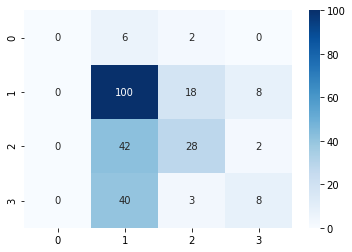

In [29]:
c_mat = metrics.confusion_matrix(y_test, y_pred,labels=[0,1,2,3])
sns.heatmap(c_mat, annot=True, fmt='g',cmap='Blues')

*Interpretation*
* The model failed to correctly predict any of the Student Achievement Rating of 0.
* The model did comparatively well in predicting Student Achievement Rating of 1.
* The model misclassified 42 Student Achievement Rating of 2 as 1. 
* The model misclassified 40 Student Achievement Rating of 3 as 1. 

**Classfication Report**

In [30]:
print(classification_report(y_test, knn.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         8
         1.0       0.53      0.79      0.64       126
         2.0       0.55      0.39      0.46        72
         3.0       0.44      0.16      0.23        51

    accuracy                           0.53       257
   macro avg       0.38      0.33      0.33       257
weighted avg       0.50      0.53      0.49       257



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



*Interpretation*
* The model is most accurate when predicting schools with Student Achievement Rating of 1. This might be due to it being the most prevalent in the dataset.

**ROC AUC**

In [31]:
y_pred_proba = knn.predict_proba(x_test)

fpr = {}
tpr = {}
thresh = {}
n_class = 4
auroc = {}

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_proba[:,i], pos_label=i)
    auroc[i]= metrics.auc(fpr[i], tpr[i])

def graph_class(fpr, tpr, n_class, auroc):
    color = ['orange', 'blue', 'green', 'red']
    label = ['Not Meeting Target', 'Meeting Target', 'Approaching Target', 'Exceeding Target']
    data = []
    fig1 = go.Figure()
    for i in range(4):
        trace = go.Scatter(x=fpr[i], y=tpr[i], name='{} (AUC={:.4f})'.format(label[i], auroc[i]))
        data.append(trace)
    
    layout = dict(title='ROC Curve for the 4 Classes',
                  xaxis=dict(title='False Positive Rate'),
                  yaxis=dict(title='True Positive Rate'))
    
    fig=dict(data = data, layout=layout)
    iplot(fig)

graph_class(fpr, tpr, n_class, auroc)


In [32]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    
    lb = LabelBinarizer()
    lb.fit(y_test)
    
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    
    score = metrics.roc_auc_score(y_test, y_pred, average=average)
    
    return score
auroc_score = multiclass_roc_auc_score(y_test, y_pred)

print("Overall AUROC Score of the 4 Classes: " + str(round(auroc_score,4)))

Overall AUROC Score of the 4 Classes: 0.5618


**Cross Validation**

In [33]:
scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
print('Average Cross-Validation Score: {:.4f}'.format(scores.mean()))

Average Cross-Validation Score: 0.5111


**Conclusion**
* The model overall has a low accuracy score. 
* I think this could be contributed by features having low correlation to the target variable and the dataset having significantly uneven number of classes. 